<span style="font-size:3em; text-align:center">Information System Security -</span>

<span style="font-size:3em; text-align:center">Anomaly-based Intrusion Detection System</span>

Data is contained in 8 different CSV files, each containing different attack data at different times. So first thing we must do is merge all the data from files into one pandas DataFrame.

In [1]:
import pandas as pd
import glob

In [2]:
# Saving all .csv files in folder to list.
path = "MachineLearningCVE/"
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [3]:
[print(f) for f in files]

MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
MachineLearningCVE\Wednesday-workingHours.pcap_ISCX.csv


[None, None, None, None, None, None, None, None]

In [4]:
# Reading all the csv files into dataframes and putting thoose DFs to one list.

dataset = [pd.read_csv(f) for f in files]

c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
# Here we can see the number of rows and columns for each table.

for d in dataset:
    print(d.shape)

(225745, 79)
(286467, 79)
(191033, 79)
(529918, 79)
(288602, 79)
(170366, 79)
(445909, 79)
(692703, 79)


In [6]:
# We already established that all tables have the same number of columns, but are they the same columns?
# This next piece of code loops over all given tables and compares each of them to all others.

for i in range(0,len(dataset)):
    if i != len(dataset)-1:
        same_columns = dataset[i].columns == dataset[i+1].columns
        
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [7]:
# Combining all tables into one dataset. This is possilbe since all tables have the same columns,
# as we checked in the cell above.

dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)

In [8]:
# By checking the shape of dataset we can confirm that concatenation has been successfull.

dataset.shape

(2451998, 79)

# Preliminary data analysis

Some general info about the dataset. It contains roughly 2.5 million records across 79 columns. Data consists of mostly int64 and float64 types, except 3 attributes of 'object' type. 

Dataset contains of network traffic data during different attacks, represented with values like: port numbers, IP adressses, packet lenghts, SYN/ACK/FIN/.. flag counts, packet size and other...

In [2]:
#dataset = pd.read_csv('Dataset_clean.csv', index_col=[0])
dataset.info()

c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2451998 entries, 0 to 2451997
Data columns (total 79 columns):
DestinationPort            int64
FlowDuration               int64
TotalFwdPackets            int64
TotalBackwardPackets       int64
TotalLengthofFwdPackets    int64
TotalLengthofBwdPackets    int64
FwdPacketLengthMax         int64
FwdPacketLengthMin         int64
FwdPacketLengthMean        float64
FwdPacketLengthStd         float64
BwdPacketLengthMax         int64
BwdPacketLengthMin         int64
BwdPacketLengthMean        float64
BwdPacketLengthStd         float64
FlowBytes/s                object
FlowPackets/s              object
FlowIATMean                float64
FlowIATStd                 float64
FlowIATMax                 int64
FlowIATMin                 int64
FwdIATTotal                int64
FwdIATMean                 float64
FwdIATStd                  float64
FwdIATMax                  int64
FwdIATMin                  int64
BwdIATTotal                int64
BwdIATMean 

In [5]:
dataset.describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,...,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06,2.451998e+06
mean,8.804922e+03,1.704883e+07,1.052762e+01,1.186615e+01,6.281065e+02,1.865192e+04,2.372695e+02,1.931056e+01,6.484734e+01,7.948213e+01,...,6.165070e+00,-3.169526e+03,9.414805e+04,4.748785e+04,1.768437e+05,6.730041e+04,9.598579e+06,5.816696e+05,1.003695e+07,9.141405e+06
std,1.918522e+04,3.560952e+07,8.054868e+02,1.071646e+03,1.073530e+04,2.431588e+06,7.660169e+02,6.135372e+01,1.980198e+02,3.007317e+02,...,6.838105e+02,1.165777e+06,6.960432e+05,4.223156e+05,1.100308e+06,6.195736e+05,2.514366e+07,4.941143e+06,2.592067e+07,2.487733e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.270000e+02,2.000000e+00,1.000000e+00,2.400000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.978800e+04,2.000000e+00,2.000000e+00,6.800000e+01,1.610000e+02,4.100000e+01,2.000000e+00,3.700000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.496288e+06,6.000000e+00,5.000000e+00,3.430000e+02,1.404750e+03,2.160000e+02,3.700000e+01,5.300000e+01,7.776586e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


Upon further inspection we can see that dataset contains 15 labels. Labels represent network/web attacks and BENIGN state which is the network traffic during normal business day. 

In [9]:
# Dataset conatains 15 labels.
#print(dataset[' Label'].unique())
#len(dataset[' Label'].unique())

print(dataset['Label'].unique())
len(dataset['Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'Web_Attack_Brute_Force'
 'Web_Attack_XSS' 'Web_Attack_Sql_Injection' 'FTPPatator' 'SSHPatator'
 'DoS_slowloris' 'DoS_Slowhttptest' 'DoS_Hulk' 'DoS_GoldenEye'
 'Heartbleed']


15

In [10]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Most records in the dataset are of DDos and DOS Hulk attacks. This might pose a problem later in model training, considering that there is a very small amount of data for most attacks. Model selection will be greatly influenced by this information.

In [62]:
data = dataset['Label'].where(dataset['Label'] != "BENIGN")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

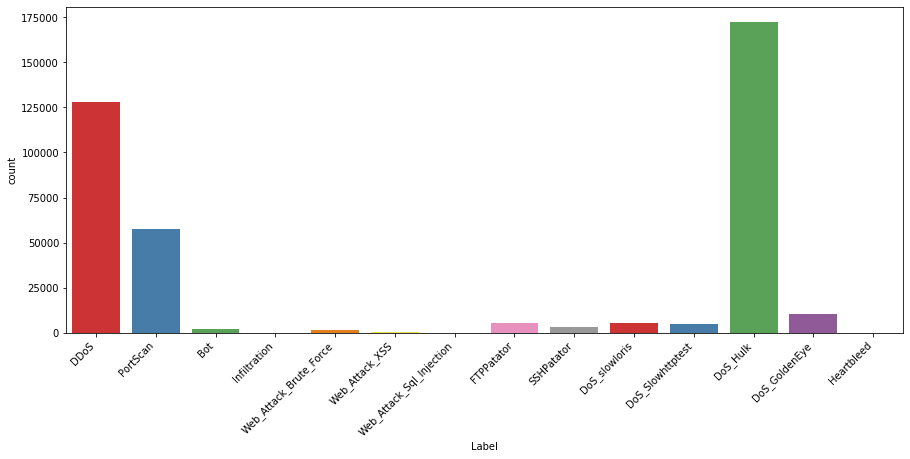

In [72]:
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

# Data Cleaning

This chapter contains data cleaning code. We go through the process of renaming columns, removing NaN and non-finite values (-inf, inf) to get the data ready for visualization and model training.

## Renaming columns

In [13]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
# Here we can see that 'Label' column contains some wierd characters. 

dataset["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [15]:
# This next snippet uses regular expressions to replace wierd characters with dunders.

label_names = dataset['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

In [16]:
# Replacing 'Label' column values with new readable values.

labels = dataset['Label'].unique()

for i in range(0,len(label_names)):
    dataset['Label'] = dataset['Label'].replace({labels[i] : label_names[i]})
    
dataset['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

In [17]:
len(dataset['Label'].unique())

15

In [18]:
# Saving cleaned dataset.

#dataset.to_csv("Dataset_clean.csv", index=False)

## Removing NULL values

In [23]:
#dataset = pd.read_csv("Dataset_clean.csv", index_col=0)
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
# Checking if there are any NULL values in the dataset.

dataset.isnull().values.any()

True

In [25]:
# Checking which column/s contain NULL values.

[col for col in dataset if dataset[col].isnull().values.any()]

['FlowBytes/s']

In [26]:
# Checking how many NULL values it this column contains.

dataset['FlowBytes/s'].isnull().sum()

334

In [27]:
# Considering that only 334 rows contain NULL vlaues in the entire dataset, which makes about 0.01%, we
# can safely remove all NULL rows without spoiling the data.

334/dataset.shape[0]*100

0.013621544552646454

In [28]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = dataset.shape

dataset.dropna(inplace=True)

after = dataset.shape

before[0] - after[0]

334

In [29]:
dataset.isnull().any().any()

False

## Removing *non-finite* values

In [30]:
import numpy as np

In [31]:
labl = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [32]:
# Checking if all values are finite.

np.all(np.isfinite(dataset))

False

In [33]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [34]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowBytes/s']).sum()

dataset.shape[0] - finite

1132

In [35]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowPackets/s']).sum()

dataset.shape[0] - finite

1132

In [36]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.

# Replacing infinite values with NaN values.
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [37]:
# We can see that now we have Nan values again.

np.any(np.isnan(dataset))

True

In [38]:
# Bringing the Labels back into the dataset before deliting Nan rows.

dataset = dataset.merge(labl, how='outer', left_index=True, right_index=True)

In [39]:
# Removing new NaN values.

dataset.dropna(inplace=True)

In [40]:
dataset.shape

(2450532, 79)

In [41]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [42]:
# Saving cleaned dataset.

#dataset.to_csv("Dataset_clean_dropna.csv", index=False)

# Data visualization

So, by now we know our dataset has 78 features and is split into 15 categories (14 attacks and 1 "normal" state).
Next step is to try and visualize what the dataset looks like in feature space.
For this we will use principal component analysis (PCA) to reduce dimensionality and then pass the reduced dataset to t-SNE (t - Distributed Stohastic Neighbor Entities) for visual representation in 2D space.

In [190]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [206]:
# We are going to pick 10.000 random rows from the dataset for visualization purposes.
# Setting the random seed for reproducability of results.

np.random.seed(42)

rand_perm = np.random.permutation(dataset.shape[0])

In [214]:
feature_cols = dataset.columns[:-1]

dataset_subset = dataset.loc[rand_perm[:10000],:]

c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [215]:
dataset_subset = dataset_subset.replace([np.inf, -np.inf], np.nan)
dataset_subset.dropna(inplace=True)

In [216]:
data_subset = dataset_subset[feature_cols].values

In [195]:
# Performing the principal component analysis. With just 19 components the variance ratio remains 99%, which is great.

pca = PCA(n_components=19)
pca_res = pca.fit_transform(data_subset)

data_subset = None
np.sum(pca.explained_variance_ratio_)

0.9999379655912742

In [217]:
# Computing t-SNE.

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_res = tsne.fit_transform(data_subset)
print("done")

done


In [218]:
dataset_subset['tsne_firstD'] = tsne_res[:,0]
dataset_subset['tsne_secondD'] = tsne_res[:,1]

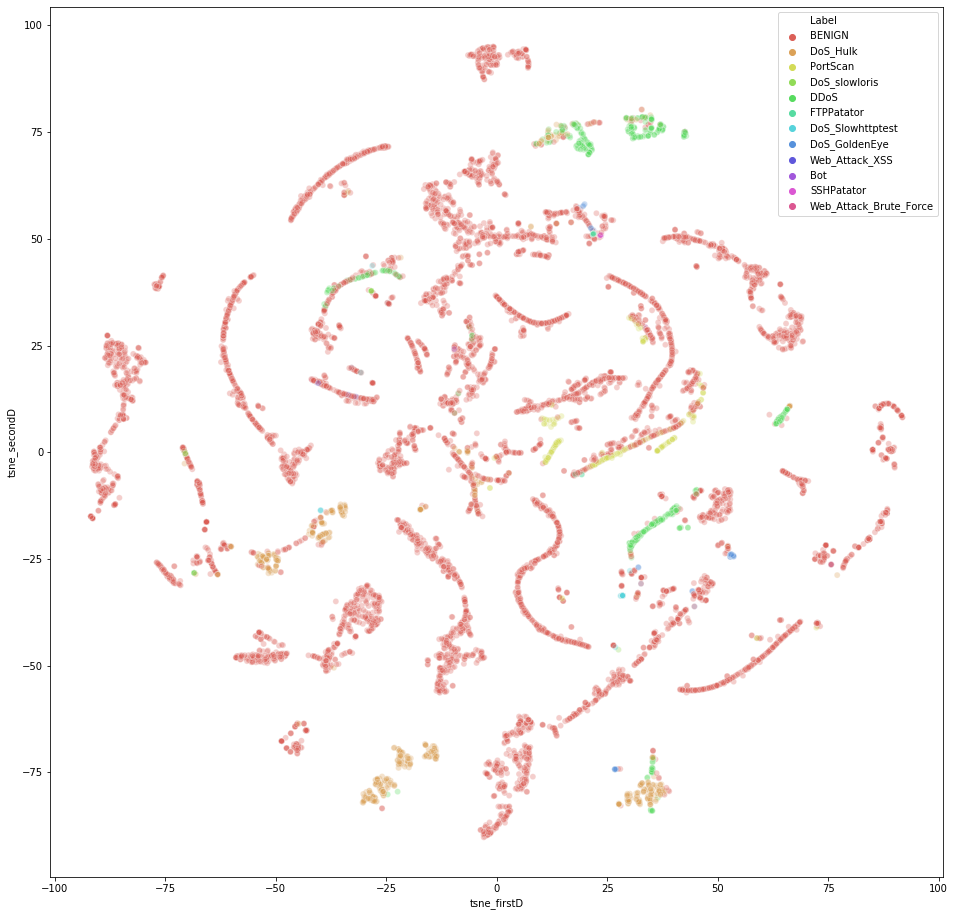

In [220]:
plt.figure(figsize=(16,16))

sns.scatterplot(
    x="tsne_firstD", y="tsne_secondD",
    palette=sns.color_palette("hls", colors),
    data=dataset_subset,
    hue="Label",
    legend="full",
    alpha=0.3
)

From the cell above we can see distribution of the data in 2D space. It is obvious that attacks are not spatialy well separated from normal state. Clusters of attacks can hardly be seen, instead they are found in the same place as the "normal state" datatpoints.

This insight leads us to conclude that the ML model will probably have some issues with this kind of data. ML model will have to be chosen with this in mind.

# Data preparation

In this chapter, final data preparation steps are taken before we use the data for model traning and testing.

These steps include:

* Data scaling
* Label encoding
* Data splitting

In [2]:
#dataset = pd.read_csv("Dataset_clean_dropna.csv")

## Scaling the data

The next few cells contain the code for scaling the data into the size adequate for the ML algorithm. 

In [3]:
# Splitting dataset into features and labels.

labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [4]:
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

For scaling the data we used RobustScaler class from sklearn. RobustScaler is used to perserve outliers in the data.

In [6]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [7]:
# Checking if scaling has been succesful.
features[0]

array([ 1.40474359e+02, -1.08842743e-02,  0.00000000e+00, -5.00000000e-01,
       -1.75000000e-01, -1.14326041e-01, -1.66666667e-01,  1.08108108e-01,
       -6.59574468e-01,  0.00000000e+00, -1.17233294e-01,  0.00000000e+00,
       -4.06250000e-01,  0.00000000e+00,  5.17015897e+01,  4.18340621e+01,
       -3.64260699e-02, -8.53215162e-03, -9.45038074e-03, -1.49253731e-02,
       -8.85915295e-06, -5.67715025e-05,  0.00000000e+00, -9.42805378e-06,
        0.00000000e+00, -1.85178327e-05, -9.49938254e-05,  0.00000000e+00,
       -2.26719240e-05, -6.38297872e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.14285714e-01, -3.57142857e-01,
        7.70059825e+01, -5.27501871e-02,  1.08108108e-01, -7.23589001e-02,
       -3.73417722e-01, -9.42324454e-02, -8.73549112e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
       -4.14634146e-01, -

## Label encoding

Label encoding is done when dataset contains categorical values (ex. 0-5, A/B/C, 55+). It is used to turn categorical values into numerical values by replacing data categories with integers starting with 0.

In [97]:
# No need to do previous operations, just load clean saved dataset.

#dataset = pd.read_csv('Dataset_clean.csv', index_col=[0])

c:\users\marko\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
from sklearn.preprocessing import LabelEncoder

'Lables' column contains categorical values - 15 of them (14 types of attacks in our dataset +  1 normal state).

To convert this into numerical values we will use 'LabelEncoder' class from sklearn.

In [9]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [10]:
# Labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [11]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

## Splitting the data

Final step to data preparation is splitting the data into traning and testing sets. For this there already exists _sklearn_ function that does all the splitting for us. This step is important so we can have representative data for evaluating our model. Both train and test samples should contain similar data variance.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1960425, 78), (490107, 78), (1960425,), (490107,))

In [14]:
# Clearing variables.

dataset = None
finite = None
labl = None
d = None
features = None
labels = None

# Model training

For completing this task we chose to use a neural network. Specifically, the multi-layer perceptron, more specifically, feedforward neural network multi-class classifier with backpropagating algorithm. NN will be used to classifiy 14 different attacks and 1 normal state, as we saw from the labels in previous chapters.

In this chapter we go by explaning parts of the network and its hyperparameters.

In [56]:
import tensorflow as tf
import datetime

#%load_ext tensorboard

Our tensorflow Sequential model has 3 layers. Input, 1 hidden and an output layer.

* Input layer has 78 neurons, one for each feature.
* Hidden layer has 67 neurons, this number has been calculated by [formula](https://www.heatonresearch.com/2017/06/01/hidden-layers.html) 2/3 the number of input neurons + number of output neurons.
* Output layer has 15 neurons, one for each class we predict.

For activation functions, we used standard functions for multi-class classification tasks - ReLu for hidden layer and _softmax_ function for output layer.

Finally, we use Dropout parameter set to 0.2 for randomly shutting off 20% of neurons in each learning iteration. This technique is used for decreasing overfitting thereby incresing network accuracy.

In [24]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(78,)),
    tf.keras.layers.Dense(67, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])

For learning rate optimization we used Adam optimizer.
Loss function used is sparse categorical crossentropy, which is standard for multiclass classification problems.

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
import os

In the next cell we setup training logs for tensorboard as well as some tensorboard callbacks.

* tensorboard - callback that logs training data.
* EarlyStopping - callback that monitors 'loss (function)' metric and if the loss function does not get better in tne hext 10 iterations, callback stops the training and resotres the network with best weights up untill that iteration.

In [61]:
log_dir = os.path.join(
    "train_logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

# TF callback that sets up TensorBoard with training logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached. It also
# restores weights from the best training iteration.
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [62]:
model.fit(features_train,
          labels_train,
          epochs=100,
          callbacks=[tensorboard_callback, eary_stop_callback])

Train on 1960425 samples
Epoch 1/100
1960425/1960425 [==============================] - 66s 33us/sample - loss: 1.3201 - accuracy: 0.9105
Epoch 2/100
1960425/1960425 [==============================] - 63s 32us/sample - loss: 1.2584 - accuracy: 0.9104
Epoch 3/100
1960425/1960425 [==============================] - 63s 32us/sample - loss: 1.2423 - accuracy: 0.9105
Epoch 4/100
1960425/1960425 [==============================] - 62s 32us/sample - loss: 1.9466 - accuracy: 0.9105
Epoch 5/100
1960425/1960425 [==============================] - 62s 32us/sample - loss: 1.1178 - accuracy: 0.9104
Epoch 6/100
1960425/1960425 [==============================] - 60s 31us/sample - loss: 1.2169 - accuracy: 0.9105
Epoch 7/100
1960425/1960425 [==============================] - 62s 32us/sample - loss: 0.8587 - accuracy: 0.9104
Epoch 8/100
1960425/1960425 [==============================] - ETA: 0s - loss: 0.7722 - accuracy: 0.91 - 63s 32us/sample - loss: 0.7720 - accuracy: 0.9104
Epoch 9/100
1960425/1960425 [

We can see that training stoped after 18 out of 100 epochs due to 'loss' function metric not changing much in the previous 10 epochs.

After training we evaluate model accuracy (next cell), and find that our model predicts attacks with **91.2% accuracy**.

In [63]:
# Evaluating model accuracy.
model.evaluate(features_test, labels_test, verbose=2)

490107/1 - 8s - loss: 0.2958 - accuracy: 0.9124


[0.28660620927896285, 0.9124497]

In [66]:
# Saving the model.

model.save('saved_models/IDS_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

# Conclusion

In this project we made a neural network classifier that can predict 14 network/web attacks and normal traffic with 91% accuracy. This model is proof-of-concept that feedforward neural network with backpropagation algorithm can be used for classifying attacks in anomaly-based intrusion detection systems.


**Propositions**

We propose a couple of solutions for improving model accuracy as well as use of some other neural network architectures.

Accuracy of this model can probably be improved by _feature engineering_ and _feature selection_. Picking the features that have the most influence on the model.

Regarding this model, we propose tuning the model hyperparameters. Changing the hidden layer activation function, early stopping callback, dropout, optimizer and loss function should increase accuracy by some extent. Another way, albeit more complicated and resource intense is to use a genetic algorithm to evolve the best neural network arhitecture for this specific task.

Finally, we propose the usage of some other ML algorithms. Random forest classifiers have been used in intrusion detection system for a while now. Alternatively, we found some sources using autoencoders for anomaly detection.